In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv("C:/Users/aswat/OneDrive/Desktop/NIT HAK/crop.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']


In [6]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
grouped = df.groupby(by='Label').mean().reset_index()
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [11]:
for i in grouped.columns[1:4]:
    print(f'Top 5 Most {i} requiring crops:')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} : {k}')


Top 5 Most Nitrogen requiring crops:
cotton : 117.77
coffee : 101.2
muskmelon : 100.32
banana : 100.23
watermelon : 99.42
Top 5 Most Phosphorus requiring crops:
apple : 134.22
grapes : 132.53
banana : 82.01
lentil : 68.36
chickpea : 67.79
Top 5 Most Potassium requiring crops:
grapes : 200.11
apple : 199.89
chickpea : 79.92
watermelon : 50.22
muskmelon : 50.08


<AxesSubplot:>

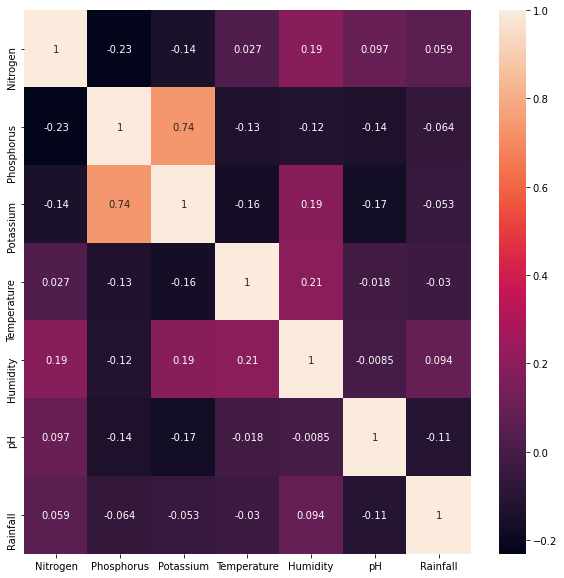

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

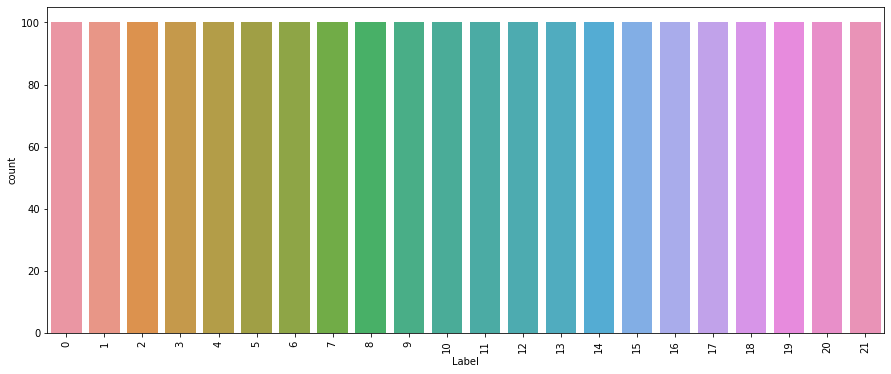

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Data Processing

In [15]:
names=df['Label'].unique()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [17]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

In [ ]:
#Model Building

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.80      0.93      0.86        30
           9       0.97      1.00      0.98        30
          10       1.00      1.00      1.00        30
          11       1.00      0.93      0.97        30
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [22]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\aswat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.79      0.73      0.76        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.81      0.97      0.88        30
           7       1.00      1.00      1.00        30
           8       0.86      1.00      0.92        30
           9       1.00      1.00      1.00        30
          10       0.83      0.83      0.83        30
          11       0.85      0.77      0.81        30
          12       1.00      1.00      1.00        30
          13       0.77      0.80      0.79        30
          14       1.00      0.97      0.98        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [24]:
rcv=RandomForestClassifier(random_state=42)
rcv.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
print(classification_report(y_test,rcv.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [26]:
pickle.dump(rcv, open('random_forest.pkl','wb'))
